In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/ML.csv')

In [3]:
df.isna().sum()

Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer    2719
Notice period                  0
Offered band                   0
Percent difference CTC       851
Joining Bonus                  0
Candidate Source               0
Location                       0
Status                         0
dtype: int64

In [4]:
df

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Percent difference CTC,Joining Bonus,Candidate Source,Location,Status
0,2110407,Yes,14.0,30,E2,42.86,No,Agency,Noida,0
1,2112635,No,18.0,30,E2,180.00,No,Employee Referral,Chennai,0
2,2112838,No,3.0,45,E2,0.00,No,Agency,Noida,0
3,2115021,No,26.0,30,E2,0.00,No,Employee Referral,Noida,0
4,2115125,Yes,1.0,120,E2,0.00,No,Employee Referral,Noida,0
...,...,...,...,...,...,...,...,...,...,...
12328,3828260,No,NaN,0,E0,-3.18,No,Direct,Chennai,0
12329,3830270,No,NaN,0,E0,-3.18,No,Direct,Chennai,0
12330,3834159,No,0.0,0,E2,0.00,No,Direct,Noida,0
12331,3835433,No,0.0,30,E1,-13.04,No,Direct,Noida,0


In [5]:
df['DOJ Extended'] = df['DOJ Extended'].replace({"Yes":1,"No":0})
df['Joining Bonus'] = df['Joining Bonus'].replace({"Yes":1,"No":0})
df['Designation offered'] = df['Offered band'].replace({"E0":'Entry-level',"E1":"Junior","E2":"Mid-level","E3":"Senior","E4":"Senior","E5":"Senior","E6":"Senior"})

In [6]:
df['Location'].unique()

array(['Noida', 'Chennai', 'Gurgaon', 'Bangalore', 'Kolkata', 'Mumbai',
       'Hyderabad', 'Cochin', 'Pune', 'Others', 'Coimbatore', 'Ahmedabad'],
      dtype=object)

In [7]:
df['Percent difference CTC'] = df['Percent difference CTC'].apply(lambda x: 'LESS THAN THE EXPECTATION' if x < 0 else('MATCHED THE EXPECTATION' if x == 0 else 'EXCEEDED THE EXPECTATION'))

In [8]:
df['Duration to accept offer'] = df['Duration to accept offer'].apply(lambda x: '< 10 days' if x <=10 else '> 10 days')

In [9]:
df['Notice period'] = df['Notice period'].apply(lambda x: '< 1 month' if x < 30 else('1 to 2 months' if x < 60 else '> 2 months'))

In [10]:
df = df.drop(columns = ['Offered band','Candidate Ref','Location'], axis = 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   DOJ Extended              12333 non-null  int64 
 1   Duration to accept offer  12333 non-null  object
 2   Notice period             12333 non-null  object
 3   Percent difference CTC    12333 non-null  object
 4   Joining Bonus             12333 non-null  int64 
 5   Candidate Source          12333 non-null  object
 6   Status                    12333 non-null  int64 
 7   Designation offered       12333 non-null  object
dtypes: int64(3), object(5)
memory usage: 770.9+ KB


H2O

In [ ]:
!pip install h2o
import h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,20 mins 52 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_3tmwz4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.171 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df = h2o.H2OFrame(df)
df['DOJ Extended'] = df['DOJ Extended'].scale(center = True, scale = True)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df['Joining Bonus'] = df['Joining Bonus'].scale(center = True, scale = True)

In [ ]:
df.col_names

['DOJ Extended',
 'Duration to accept offer',
 'Notice period',
 'Percent difference CTC',
 'Joining Bonus',
 'Candidate Source',
 'Status',
 'Designation offered']

In [ ]:
train, valid = df.split_frame(ratios = [.8])
X = ['DOJ Extended',
 'Duration to accept offer',
 'Notice period',
 'Percent difference CTC',
 'Joining Bonus',
 'Candidate Source',
 'Designation offered']
y = 'Status'

In [ ]:
from h2o.estimators import H2ORandomForestEstimator

In [ ]:
rf = H2ORandomForestEstimator(seed=1, nfolds=5, model_id="rf",
    ntrees=50,
    max_depth=10,
    stopping_rounds=2,
    stopping_tolerance=0.01,
    score_each_iteration=True)

In [ ]:
rf.train(x=X, y=y, training_frame=train, validation_frame = valid)

drf Model Build progress: |

/usr/local/lib/python3.9/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    4                  4                           6219                   10           10           10            106           128           119.25

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.17788407843352325
RMSE: 0.42176305958858373
MAE: 0.35079754286840176
RMSLE: 0.29648198032467254
Mean Residual Deviance: 0.17788407843352325

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.17545119413211976
RMSE: 0.4188689462494442
MAE: 0.35283601663723035
RMSLE: 0.2941015466612333
Mean Residual Deviance: 0.17545119413211976

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.17147721099484725
RMSE: 0.4140980692962082
MAE: 0.34849270610926253
RMSLE: 0.2906787059297485
Mean Residual Deviance: 0.17147721099484725

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.349767  0.00466944  0.354491      0.353979      0.345553      0.350428      0.344385
mean_residual_deviance  0.17118   0.00405315  0.177363      0.172805      0.168811      0.169952      0.16697
mse                     0.17118   0.00405315  0.177363      0.172805      0.168811      0.169952      0.16697
r2                      0.173076  0.0205788   0.144063      0.16751       0.201074      0.173568      0.179165
residual_deviance       0.17118   0.00405315  0.177363      0.172805      0.168811      0.169952      0.16697
rmse                    0.413716  0.00488238  0.421145      0.415698      0.410866      0.412252      0.40862
rmsle                   0.290417  0.0031823   0.295169      0.29168       0.28763       0.290098      0.287508

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-03-25 17:39:52  1.882 sec   0                  nan              nan             nan                  nan                nan               nan
    2023-03-25 17:39:52  1.922 sec   1                  0.430884         0.354583        0.185661             0.428829           0.352538          0.183895
    2023-03-25 17:39:52  2.097 sec   2                  0.42697          0.351989        0.182303             0.42072            0.350349          0.177006
    2023-03-25 17:39:53  2.461 sec   3                  0.422577         0.347538        0.178572             0.418039           0.347649          0.174756
    2023-03-25 17:39:53  2.948 sec   4                  0.421763         0.350798        0.177884             0.418869           0.352836          0.175451

Variable Importances: 
variable                  relative_importance    scaled_importance    percentage
------------------------  ---------------------  -------------------  ------------
Notice period             272.189                1                    0.276746
DOJ Extended              195.692                0.718955             0.198968
Percent difference CTC    175.808                0.645905             0.178752
Duration to accept offer  172.981                0.635518             0.175877
Designation offered       87.2414                0.320518             0.0887021
Candidate Source          60.0425           

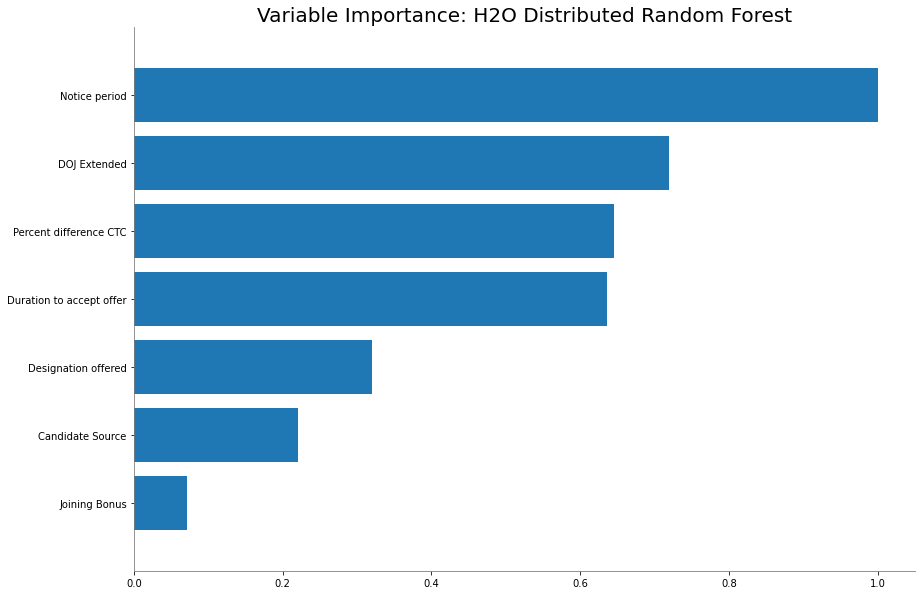

<Figure size 432x288 with 0 Axes>

In [ ]:
rf.varimp_plot()

In [ ]:
dir(rf)

['_H2OEstimator__default_params',
 '_ModelBase__generate_partial_plots',
 '_ModelBase__generate_user_splits',
 '_ModelBase__grab_values',
 '_ModelBase__plot_1d_pdp',
 '_ModelBase__plot_1d_pdp_multinomial',
 '_ModelBase__plot_2d_pdp',
 '_ModelBase__pred_for_3d',
 '_ModelBase__set_axs_1d',
 '_ModelBase__set_axs_1d_multinomial',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_allowed_metrics',
 '_allowed_metrics_',
 '_bc',
 '_bci',
 '_calibrate',
 '_check_and_save_parm',
 '_check_targets',
 '_default_metric',
 '_default_metrics_',
 '_default_param_value',
 '_end_time',
 '_estimator_type',
 '_extract_scoring_history',
 '_fillMultinomialDic

Permutation Importance

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df1 =  h2o.as_list(df)

In [ ]:
X = df1.drop('Status', axis = 1)
Y = df1['Status']

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DOJ Extended              12333 non-null  float64
 1   Duration to accept offer  12333 non-null  object 
 2   Notice period             12333 non-null  object 
 3   Percent difference CTC    12333 non-null  object 
 4   Joining Bonus             12333 non-null  float64
 5   Candidate Source          12333 non-null  object 
 6   Status                    12333 non-null  int64  
 7   Designation offered       12333 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 770.9+ KB


In [ ]:
categories = ['Duration to accept offer','Notice period','Percent difference CTC','Candidate Source','Designation offered']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categories)
    ])

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=50,max_depth=10, n_jobs = -1))
])

In [ ]:
pipeline.fit(X, Y)

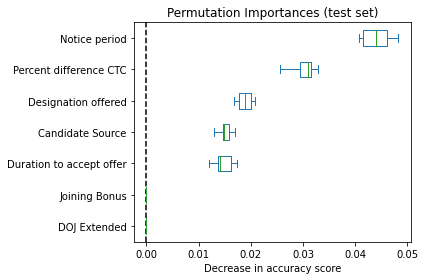

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    pipeline, X, Y, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('/content/importance.csv')

In [ ]:
df1 = df1.sort_values('Mean Decrease in Accuracy (%)', ascending = True)

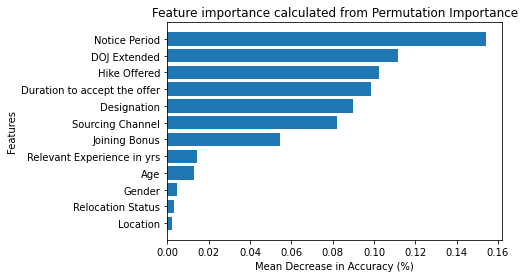

In [ ]:

plt.barh(df1['Feature'],df1['Mean Decrease in Accuracy (%)'])
plt.xlabel('Mean Decrease in Accuracy (%)')
plt.ylabel('Features')
plt.title('Feature importance calculated from Permutation Importance')
plt.savefig('Img1.jpg', dpi = 500,bbox_inches="tight")


In [ ]:
df2 = pd.read_csv('/content/importancescreening.csv')
df2 = df2.sort_values('Mean Decrease in Accuracy (%)', ascending = True)

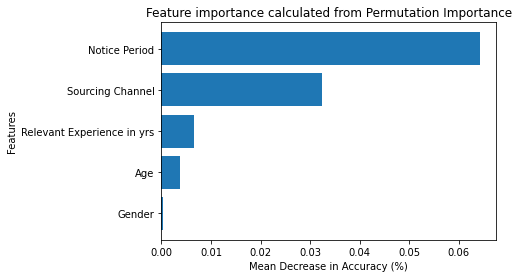

In [ ]:

plt.barh(df2['Feature'],df2['Mean Decrease in Accuracy (%)'])
plt.xlabel('Mean Decrease in Accuracy (%)')
plt.ylabel('Features')
plt.title('Feature importance calculated from Permutation Importance')
plt.savefig('Img2.jpg', dpi = 500,bbox_inches="tight")

In [ ]:
df3 = pd.read_csv('/content/importancescreeningoffer.csv')
df3 = df3.sort_values('Mean Decrease in Accuracy (%)', ascending = True)

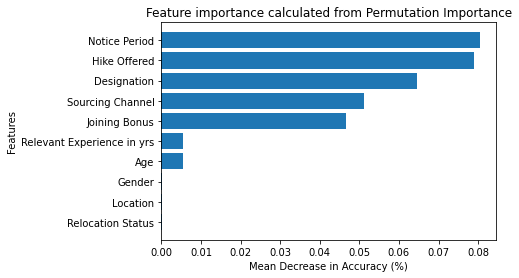

In [ ]:

plt.barh(df3['Feature'],df3['Mean Decrease in Accuracy (%)'])
plt.xlabel('Mean Decrease in Accuracy (%)')
plt.ylabel('Features')
plt.title('Feature importance calculated from Permutation Importance')
plt.savefig('Img3.jpg', dpi = 500,bbox_inches="tight")

Chi-Square test

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   DOJ Extended              12333 non-null  int64 
 1   Duration to accept offer  12333 non-null  object
 2   Notice period             12333 non-null  object
 3   Percent difference CTC    12333 non-null  object
 4   Joining Bonus             12333 non-null  int64 
 5   Candidate Source          12333 non-null  object
 6   Status                    12333 non-null  int64 
 7   Designation offered       12333 non-null  object
dtypes: int64(3), object(5)
memory usage: 770.9+ KB


In [14]:
import scipy.stats as stats

In [18]:
crosstab = pd.crosstab(df['Notice period'],df['Status'])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=693.8454217480443, pvalue=2.1546712680227375e-151, dof=2, expected_freq=array([[4954.28322387, 2048.71677613],
       [1267.75318252,  524.24681748],
       [2502.96359361, 1035.03640639]]))

In [19]:
crosstab = pd.crosstab(df['Candidate Source'],df['Status'])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=170.45598213802828, pvalue=9.681748012209225e-38, dof=2, expected_freq=array([[2242.6214222 ,  927.3785778 ],
       [5005.21973567, 2069.78026433],
       [1477.15884213,  610.84115787]]))

In [20]:
crosstab = pd.crosstab(df['Designation offered'],df['Status'])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=92.27603206452066, pvalue=7.106094810473833e-20, dof=3, expected_freq=array([[ 748.4837428 ,  309.5162572 ],
       [4949.331063  , 2046.668937  ],
       [2446.36746939, 1011.63253061],
       [ 580.8177248 ,  240.1822752 ]]))

In [21]:
crosstab = pd.crosstab(df['Percent difference CTC'],df['Status'])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=325.01885042580255, pvalue=2.648825646931678e-71, dof=2, expected_freq=array([[1961.05570421,  810.94429579],
       [3743.12616557, 1547.87383443],
       [3020.81813022, 1249.18186978]]))

In [22]:
crosstab = pd.crosstab(df['DOJ Extended'],df['Status'])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=263.9216016582574, pvalue=2.3973129144585235e-59, dof=1, expected_freq=array([[5135.39082137, 2123.60917863],
       [3589.60917863, 1484.39082137]]))

In [29]:
df['Hike and Joining Bonus'] = df['Percent difference CTC'] + df['Joining Bonus'].apply(lambda x:'Yes' if x == 1 else 'No')

In [31]:
crosstab = pd.crosstab(df['Hike and Joining Bonus'],df['Status'])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=340.5574186475376, pvalue=1.887211475022264e-71, dof=5, expected_freq=array([[1891.01800049,  781.98199951],
       [  70.03770372,   28.96229628],
       [3529.47579664, 1459.52420336],
       [ 213.65036893,   88.34963107],
       [2927.43452526, 1210.56547474],
       [  93.38360496,   38.61639504]]))

In [33]:
df['DOJ and Duration'] = df['Duration to accept offer'] + df['DOJ Extended'].apply(lambda x:'Yes' if x == 1 else 'No')

In [34]:
crosstab = pd.crosstab(df['DOJ and Duration'],df['Status'])
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=894.4448008835934, pvalue=1.4189950251324101e-193, dof=3, expected_freq=array([[2535.50636504, 1048.49363496],
       [1035.70907322,  428.29092678],
       [2599.88445634, 1075.11554366],
       [2553.90010541, 1056.09989459]]))